In [10]:
import keras 
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint

from tensorflow.keras import layers

from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt

import seaborn as sns

import numpy as np

In [18]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

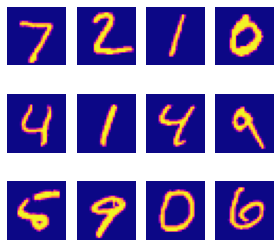

In [3]:
plt.figure( figsize= (4,4) )

for sch in range(12):
    plt.subplot( 3,4, sch+1)
    plt.imshow(X_valid[ sch], cmap='plasma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
y_train.shape

(60000,)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
28*28

784

In [7]:
X_train_L = X_train.reshape(60000, 784).astype('float32')
X_valid_L = X_valid.reshape(10000, 784).astype('float32')

In [8]:
X_train_L[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [15]:
X_train_L /=255
X_valid_L /= 255 


In [16]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)


In [12]:
'''model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,) ) )
model.add(Dense(10, activation='softmax' ) )
'''
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [19]:
#model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'] )

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15


ValueError: in user code:

    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "D:\venvs\ml310venv\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\venvs\ml310venv\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "D:\venvs\ml310venv\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "D:\venvs\ml310venv\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "D:\venvs\ml310venv\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [14]:


model.fit(X_train_L, y_train, 
          batch_size=128, epochs=200, 
          verbose=1, validation_data=(X_valid_L, y_valid))


Epoch 1/200
469/469 [==============================] - 3s 2ms/step - loss: 2.0800 - accuracy: 0.4903 - val_loss: 1.8385 - val_accuracy: 0.7092
Epoch 2/200
469/469 [==============================] - 1s 2ms/step - loss: 1.6443 - accuracy: 0.7301 - val_loss: 1.4392 - val_accuracy: 0.7678
Epoch 3/200
469/469 [==============================] - 1s 2ms/step - loss: 1.2996 - accuracy: 0.7800 - val_loss: 1.1440 - val_accuracy: 0.8069
Epoch 4/200
469/469 [==============================] - 1s 1ms/step - loss: 1.0580 - accuracy: 0.8094 - val_loss: 0.9468 - val_accuracy: 0.8280
Epoch 5/200
469/469 [==============================] - 1s 1ms/step - loss: 0.8966 - accuracy: 0.8277 - val_loss: 0.8145 - val_accuracy: 0.8467
Epoch 6/200
469/469 [==============================] - 1s 1ms/step - loss: 0.7864 - accuracy: 0.8410 - val_loss: 0.7225 - val_accuracy: 0.8566
Epoch 7/200
469/469 [==============================] - 1s 2ms/step - loss: 0.7078 - accuracy: 0.8510 - val_loss: 0.6552 - val_accuracy: 0.8636

Epoch 58/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2869 - accuracy: 0.9189 - val_loss: 0.2771 - val_accuracy: 0.9233
Epoch 59/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2853 - accuracy: 0.9192 - val_loss: 0.2758 - val_accuracy: 0.9231
Epoch 60/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2839 - accuracy: 0.9196 - val_loss: 0.2744 - val_accuracy: 0.9237
Epoch 61/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2824 - accuracy: 0.9200 - val_loss: 0.2731 - val_accuracy: 0.9242
Epoch 62/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2810 - accuracy: 0.9204 - val_loss: 0.2717 - val_accuracy: 0.9246
Epoch 63/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2796 - accuracy: 0.9209 - val_loss: 0.2706 - val_accuracy: 0.9245
Epoch 64/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9212 - val_loss: 0.2694 - val_accuracy:

Epoch 115/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2270 - accuracy: 0.9361 - val_loss: 0.2242 - val_accuracy: 0.9369
Epoch 116/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2263 - accuracy: 0.9358 - val_loss: 0.2236 - val_accuracy: 0.9376
Epoch 117/200
469/469 [==============================] - 1s 1ms/step - loss: 0.2255 - accuracy: 0.9365 - val_loss: 0.2228 - val_accuracy: 0.9374
Epoch 118/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2248 - accuracy: 0.9367 - val_loss: 0.2221 - val_accuracy: 0.9378
Epoch 119/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2240 - accuracy: 0.9367 - val_loss: 0.2214 - val_accuracy: 0.9383
Epoch 120/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2233 - accuracy: 0.9369 - val_loss: 0.2208 - val_accuracy: 0.9382
Epoch 121/200
469/469 [==============================] - 1s 2ms/step - loss: 0.2225 - accuracy: 0.9373 - val_loss: 0.2201 - val_ac

In [27]:
X_valid_L[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
 test  = model.predict(X_valid_L)

313/313 [==============================] - 0s 962us/step


3.1601357e-05 ==> 0.0 ==> 0
1.5938042e-07 ==> 0.0 ==> 1
0.00019189333 ==> 0.0 ==> 2
0.0013777326 ==> 0.0 ==> 3
1.6212003e-07 ==> 0.0 ==> 4
0.000102828155 ==> 0.0 ==> 5
7.960476e-09 ==> 0.0 ==> 6
0.99799156 ==> 1.0 ==> 7
1.0900368e-05 ==> 0.0 ==> 8
0.00029309277 ==> 0.0 ==> 9


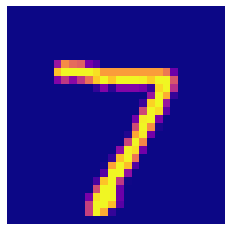

In [16]:
for ind, pr in enumerate(test[0]):
    print(pr, y_valid[0][ind], ind, sep=' ==> ')
    
plt.imshow(X_valid[ 0], cmap='plasma')
plt.axis('off')

plt.show()

In [31]:
with open('num_model.json', 'w') as f:
    f.write(model.to_json())
    

model.save_weights('weights.h5')

In [8]:
with open('num_model.json', 'r') as f:
    loaded_model = model_from_json(f.read())
    
loaded_model.load_weights('weights.h5')



313/313 [==============================] - 0s 898us/step
0.99760026 ==> 1.0 ==> 0
3.1668128e-06 ==> 0.0 ==> 1
0.0013019855 ==> 0.0 ==> 2
1.7487444e-05 ==> 0.0 ==> 3
3.2964095e-07 ==> 0.0 ==> 4
0.0008569592 ==> 0.0 ==> 5
0.00014849336 ==> 0.0 ==> 6
4.2547224e-05 ==> 0.0 ==> 7
2.0375832e-05 ==> 0.0 ==> 8
8.385519e-06 ==> 0.0 ==> 9


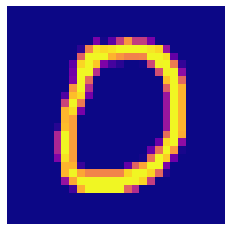

In [10]:
load_test  = loaded_model.predict(X_valid_L)
for ind, pr in enumerate(load_test[10]):
    print(pr, y_valid[10][ind], ind, sep=' ==> ')
    
plt.imshow(X_valid[ 10], cmap='plasma')
plt.axis('off')

plt.show()